In [1]:
import cv2
import math
import numpy as np
from scipy import ndimage

In [13]:
# Read image from directory
image = cv2.imread('images\houghtransform.jpg')
# image = cv2.imread('images\houghtransform_2.jpg')
img_copy = image.copy()
img_copy_1 = image.copy()
height,width = image.shape[:2]
center = (width//2, height//2)
original_image = image.copy()
# converting image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# blur image
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold image
_, threshed = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+
cv2.THRESH_OTSU)
# erode image
eroded = cv2.erode(threshed,(3,3),1)
# dilate image
dilate = cv2.dilate(eroded, (35, 35), iterations=3)

In [14]:
lines = cv2.HoughLinesP(dilate,1,np.pi/180,200,None,150,10)

In [15]:
print(lines)

[[[119 349 485 368]]

 [[485 709 856 728]]

 [[492 711 847 729]]

 [[116 350 488 369]]

 [[529 373 909 393]]

 [[481 707 859 727]]

 [[583 546 849 560]]

 [[582 544 849 558]]

 [[184 400 460 414]]

 [[601 420 888 435]]

 [[172 483 449 498]]

 [[176 449 452 464]]

 [[592 472 857 486]]

 [[184 401 460 415]]

 [[383 229 758 249]]

 [[172 480 450 495]]

 [[187 390 484 406]]

 [[376 271 728 289]]

 [[584 547 849 561]]

 [[187 388 484 404]]

 [[178 453 452 467]]

 [[ 74 689 430 708]]

 [[382 233 758 253]]

 [[177 452 452 466]]

 [[188 392 484 407]]

 [[374 283 749 303]]

 [[376 272 728 290]]

 [[587 503 884 519]]

 [[184 402 394 413]]

 [[181 419 475 434]]

 [[374 282 749 301]]

 [[382 230 758 250]]

 [[532 373 907 392]]

 [[599 442 828 454]]

 [[182 412 440 426]]

 [[599 432 875 447]]

 [[376 275 727 294]]

 [[376 273 728 291]]

 [[180 422 475 437]]

 [[376 274 728 292]]

 [[386 211 762 231]]

 [[599 430 874 445]]

 [[540 370 899 389]]

 [[178 454 452 468]]

 [[ 94 518 407 539]]

 [[378 263

In [11]:
if lines is not None:
    horizontal_lines = []
    angles = []
    for i,line  in enumerate(lines):
        x1 = line[0][0]
        y1 = line[0][1]
        x2 = line[0][2]
        y2 = line[0][3]
        cv2.line(img_copy, (x1,y1), (x2,y2), (0, 0, 255), 1, cv2.LINE_AA)
        diff_x = x2-x1
        diff_y = y2-y1
        if abs(diff_y) < 30 and abs(diff_x) != 0:
            horizontal_lines.append((x1, y1, x2, y2))
            try:
                slope = diff_y / diff_x
                angle = math.degrees(math.atan(slope))
                print(angle)
                angles.append(angle)
            except Exception as e:
                print(e)
                continue

    cv2.imshow('All Extracted Lines', img_copy)
    for line in horizontal_lines:
        # print(line)
        cv2.line(img_copy_1, (line[0],line[1]), (line[2],line[3]), (0,0,255), 1, cv2.LINE_AA)
        cv2.imshow('Formated lines',img_copy_1)
    rotation_angle = sum(angles) / len(angles)

In [8]:
img_rotated = ndimage.rotate(image, rotation_angle, reshape=True)
img_rotated = img_rotated.astype(np.uint8)

NameError: name 'rotation_angle' is not defined

In [ ]:
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)
# rotate orignal image to show transformation
rotated_image = cv2.warpAffine(original_image, rotation_matrix, (width, height), borderValue=(255, 255, 255))

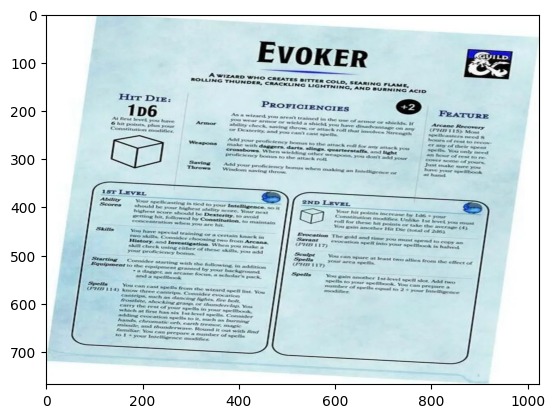

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

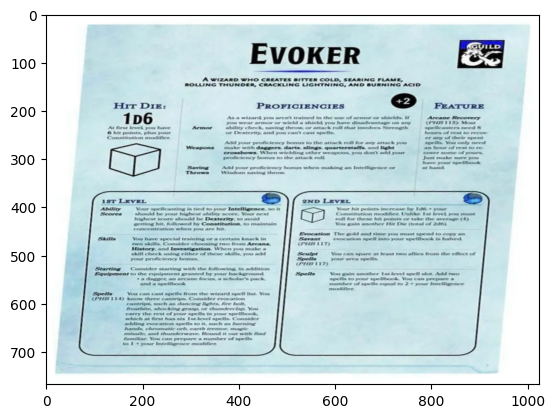

: 

In [ ]:
plt.imshow(rotated_image)
plt.show()